In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from chart_studio import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [9]:
data=pd.read_csv('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/DATASETS/CarPrice_Assignment.csv')
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
print (data['price'].argmin())

138


EXPLORATORY DATA ANALYSIS

In [11]:
print (data.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [12]:
data = data.sort_values('price', ascending = False)

In [13]:
print (data['price'])

74     45400.0
16     41315.0
73     40960.0
128    37028.0
17     36880.0
        ...   
76      5389.0
150     5348.0
50      5195.0
18      5151.0
138     5118.0
Name: price, Length: 205, dtype: float64


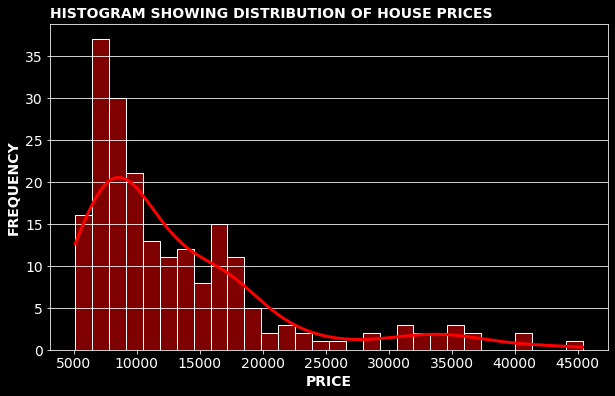

In [14]:
plt.style.use('dark_background')
# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 6))
# ax.hist(df['price'], bins = 30, color = 'blue')
plt.figure(figsize = (10,6))
sns.histplot(data['price'], bins = 30, kde = True, color = 'red', line_kws = {'linewidth': 3,'color': 'green'})
plt.tick_params(axis='both', labelsize = 14, labelcolor = 'white')
plt.xlabel('PRICE', fontsize = 14, color = 'white', fontweight = 'bold')
plt.ylabel('FREQUENCY', fontsize = 14, color = 'white', fontweight = 'bold')
plt.title('HISTOGRAM SHOWING DISTRIBUTION OF HOUSE PRICES', fontsize = 14, color = 'white', fontweight = 'bold', loc = 'left')
plt.grid(axis = 'y')
plt.savefig('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/IMAGES/ML_gig/car_level.png')

In [15]:
print (data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [16]:
data.columns = ['Car ID', 'Symboling', 'Car Name', 'Fuel Type', 'Aspiration',
       'Door Number', 'Car body', 'Drive Wheel', 'Engine Location', 'Wheelbase',
       'Car Length', 'Car Width', 'Car Height', 'Curb Weight', 'Engine Type',
       'Cylinder Number', 'Engine Size', 'Fuel System', 'Bore Ratio', 'Stroke',
       'Compression Ratio', 'Horsepower', 'Peakrpm', 'City mpg', 'Highway mpg',
       'Price']

In [17]:
print (data[data.columns[20:30]].head())

     Compression Ratio  Horsepower  Peakrpm  City mpg  Highway mpg    Price
74                 8.0         184     4500        14           16  45400.0
16                 8.0         182     5400        16           22  41315.0
73                 8.0         184     4500        14           16  40960.0
128                9.5         207     5900        17           25  37028.0
17                 8.0         182     5400        15           20  36880.0


In [18]:
data = data.reset_index()
data = data.drop('index', axis = 1)
print (data.head())

   Car ID  Symboling                         Car Name Fuel Type Aspiration  \
0      75          1  buick regal sport coupe (turbo)       gas        std   
1      17          0                           bmw x5       gas        std   
2      74          0            buick century special       gas        std   
3     129          3                   porsche boxter       gas        std   
4      18          0                           bmw x3       gas        std   

  Door Number     Car body Drive Wheel Engine Location  Wheelbase  ...  \
0         two      hardtop         rwd           front      112.0  ...   
1         two        sedan         rwd           front      103.5  ...   
2        four        sedan         rwd           front      120.9  ...   
3         two  convertible         rwd            rear       89.5  ...   
4        four        sedan         rwd           front      110.0  ...   

   Engine Size  Fuel System  Bore Ratio  Stroke Compression Ratio Horsepower  \
0     

In [19]:
print (data.head(5))

   Car ID  Symboling                         Car Name Fuel Type Aspiration  \
0      75          1  buick regal sport coupe (turbo)       gas        std   
1      17          0                           bmw x5       gas        std   
2      74          0            buick century special       gas        std   
3     129          3                   porsche boxter       gas        std   
4      18          0                           bmw x3       gas        std   

  Door Number     Car body Drive Wheel Engine Location  Wheelbase  ...  \
0         two      hardtop         rwd           front      112.0  ...   
1         two        sedan         rwd           front      103.5  ...   
2        four        sedan         rwd           front      120.9  ...   
3         two  convertible         rwd            rear       89.5  ...   
4        four        sedan         rwd           front      110.0  ...   

   Engine Size  Fuel System  Bore Ratio  Stroke Compression Ratio Horsepower  \
0     

FEATURE ENGINEERING

In [20]:
print (data['Symboling'].unique())

[ 1  0  3 -1  2 -2]


In [21]:
print (data['Fuel Type'].unique())

['gas' 'diesel']


In [22]:
print (data['Aspiration'].unique())

['std' 'turbo']


In [23]:
print (data['Door Number'].unique())

['two' 'four']


In [24]:
print (data['Car body'].unique())

['hardtop' 'sedan' 'convertible' 'hatchback' 'wagon']


In [25]:
print (data['Drive Wheel'].unique())

['rwd' 'fwd' '4wd']


In [26]:
print (data['Engine Location'].unique())

['front' 'rear']


In [27]:
print (data['Fuel System'].unique())

['mpfi' 'idi' 'spdi' '4bbl' 'mfi' '2bbl' 'spfi' '1bbl']


In [28]:
print (data['Engine Type'].unique())

['ohcv' 'ohc' 'ohcf' 'dohc' 'dohcv' 'l' 'rotor']


In [29]:
params_for_dummies = ['fueltype', 'aspiration', 'door number', 'detdummy(car_body)', 'drivewheel', \
                        'Engine Location', 'getdummy(fuelsystem)', 'getdummy(enginetype)']

In [30]:
cb = pd.get_dummies(data['Car body'], drop_first=True)
fs = pd.get_dummies(data['Fuel System'], drop_first=True)
et = pd.get_dummies(data['Engine Type'], drop_first=True)
cn = pd.get_dummies(data['Cylinder Number'], drop_first=True)

In [31]:
fuel_type_map = {'gas': 0, 'diesel': 1}
aspiration_map = {'std': 0, 'turbo': 1}
door_number_map = {'two': 0, 'four': 1}
drive_wheel_map = {'rwd': 0, 'fwd': 1, '4wd': 2}
engine_loc_map = {'front': 0, 'rear': 1}

In [32]:
data['Fuel Type'] = data['Fuel Type'].map(fuel_type_map)
data['Aspiration'] = data['Aspiration'].map(aspiration_map)
data['Door Number'] = data['Door Number'].map(door_number_map)
data['Drive Wheel'] = data['Drive Wheel'].map(drive_wheel_map)
data['Engine Location'] = data['Engine Location'].map(engine_loc_map)

In [33]:
data = pd.concat([data, cb, fs, et, cn], axis = 1)

In [34]:
data = data.drop(['Car body', 'Fuel System', 'Engine Type', 'Cylinder Number'], axis = 1)

In [35]:
def func(conv):
    return int(conv)


data['Wheelbase'] = data['Wheelbase'].apply(func)
data['Car Length'] = data['Car Length'].apply(func)

In [36]:
print (data)

     Car ID  Symboling                         Car Name  Fuel Type  \
0        75          1  buick regal sport coupe (turbo)          0   
1        17          0                           bmw x5          0   
2        74          0            buick century special          0   
3       129          3                   porsche boxter          0   
4        18          0                           bmw x3          0   
..      ...        ...                              ...        ...   
200      77          2                mitsubishi mirage          0   
201     151          1            toyota corona mark ii          0   
202      51          1                        maxda rx3          0   
203      19          2                 chevrolet impala          0   
204     139          2                           subaru          0   

     Aspiration  Door Number  Drive Wheel  Engine Location  Wheelbase  \
0             0            0            0                0        112   
1            

In [37]:
a = data.corrwith(data['Price'])
print (a.sort_values(ascending=False))

Price                1.000000
Engine Size          0.874145
Curb Weight          0.835305
Horsepower           0.808139
Car Width            0.759325
Car Length           0.683194
Wheelbase            0.580445
Bore Ratio           0.553173
mpfi                 0.517075
six                  0.474978
ohcv                 0.385991
Engine Location      0.324973
five                 0.249606
hardtop              0.225854
twelve               0.199634
Aspiration           0.177926
dohcv                0.159225
sedan                0.125716
Car Height           0.119336
Fuel Type            0.105679
idi                  0.105679
Stroke               0.079443
Compression Ratio    0.067984
l                    0.042267
Door Number          0.031835
ohcf                 0.016285
mfi                 -0.002747
rotor               -0.004544
two                 -0.004544
4bbl                -0.017306
spfi                -0.019580
wagon               -0.042310
spdi                -0.061475
three     

In [38]:
data = data.drop(['Car ID', 'Car Name'], axis = 1)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error

In [40]:
X = data.drop('Price', axis = 1).values
y = data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scale = MinMaxScaler(feature_range=(0,1))
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)
print (X)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 1. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]


In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [42]:
pred1 = pd.DataFrame(data = y_test, columns = ['true'])
pred2 = pd.DataFrame(data = lr_pred, columns = ['predictions'])
pred = pd.concat([pred1, pred2], axis = 1)
# print (pred)
print (explained_variance_score(y_test, lr_pred))

0.9061911481204176


In [43]:
dtr = DecisionTreeRegressor(splitter = 'best', max_depth=10)
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [44]:
pred1 = pd.DataFrame(data = y_test, columns = ['true'])
pred2 = pd.DataFrame(data = dtr_pred, columns = ['predictions'])
pred = pd.concat([pred1, pred2], axis = 1)
print (pred)
print (explained_variance_score(y_test, dtr_pred))

       true   predictions
0    9258.0   8076.000000
1    6575.0   5499.000000
2    6695.0   7173.750000
3    9279.0   9232.000000
4    9960.0   9232.000000
5   10198.0   9232.000000
6    8499.0   8013.000000
7   11595.0   9298.000000
8   17950.0  16900.000000
9   18280.0  18150.000000
10   7995.0   7775.000000
11  14489.0  14869.000000
12  12945.0   9232.000000
13   7799.0   6498.333333
14   7898.0   7207.857143
15  14399.0  13499.000000
16  11900.0  12440.000000
17   6989.0   8189.000000
18  18420.0  16503.000000
19  11259.0   9239.000000
20  17199.0  16558.000000
21  17450.0  15510.000000
22   7788.0   5453.333333
23  16430.0  16925.000000
24   7295.0   7173.750000
25  16630.0  12440.000000
26  16515.0  15985.000000
27   7609.0   6805.000000
28   6649.0   7207.857143
29   7999.0   7207.857143
30  20970.0  21105.000000
31  15998.0  16558.000000
32   5348.0   6319.000000
33  40960.0  45400.000000
34  31600.0  25552.000000
35   5572.0   5453.333333
36  10945.0  11845.000000
37  22018.0 

In [45]:
rfr = RandomForestRegressor(n_estimators=40)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [46]:
pred1 = pd.DataFrame(data = y_test, columns = ['true'])
pred2 = pd.DataFrame(data = rfr_pred, columns = ['predictions'])
pred = pd.concat([pred1, pred2], axis = 1)
print (pred)
print (explained_variance_score(y_test, rfr_pred))

       true   predictions
0    9258.0   8062.000000
1    6575.0   8136.262500
2    6695.0   7020.550000
3    9279.0   9422.750000
4    9960.0  10024.350000
5   10198.0  10550.675000
6    8499.0   9173.900000
7   11595.0   9367.537500
8   17950.0  15706.750000
9   18280.0  14400.416667
10   7995.0   7976.750000
11  14489.0  14751.375000
12  12945.0  11657.050000
13   7799.0   6514.400000
14   7898.0   7699.325000
15  14399.0  14865.950000
16  11900.0  14974.500000
17   6989.0   8645.225000
18  18420.0  17996.179175
19  11259.0  11038.050000
20  17199.0  17930.379175
21  17450.0  14736.137525
22   7788.0   7444.025000
23  16430.0  14720.633333
24   7295.0   7377.537500
25  16630.0  15064.000000
26  16515.0  14426.125000
27   7609.0   7260.975000
28   6649.0   6509.550000
29   7999.0   7254.883333
30  20970.0  17184.975000
31  15998.0  17256.479175
32   5348.0   6371.550000
33  40960.0  39500.350000
34  31600.0  28044.787500
35   5572.0   5779.125000
36  10945.0  12485.850000
37  22018.0 

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(units = 42, activation = 'relu'))
model.add(Dense(units = 84, activation = 'relu'))
model.add(Dense(units = 42, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(optimizer='adam', loss = 'mse')
stop = EarlyStopping(monitor = 'val_loss', patience = 25, mode = 'auto')
model.fit(
        x = X_train,
        y = y_train,
        epochs = 600,
        batch_size=1,
        validation_data=(X_test, y_test),
        callbacks=[stop]
)

Epoch 1/600
164/164 [==============================] - 2s 5ms/step - loss: 239155056.0000 - val_loss: 200509984.0000
Epoch 2/600
164/164 [==============================] - 1s 3ms/step - loss: 133084424.0000 - val_loss: 48764860.0000
Epoch 3/600
164/164 [==============================] - 1s 4ms/step - loss: 58603852.0000 - val_loss: 33318778.0000
Epoch 4/600
164/164 [==============================] - 1s 3ms/step - loss: 46251836.0000 - val_loss: 25899728.0000
Epoch 5/600
164/164 [==============================] - 1s 3ms/step - loss: 37521104.0000 - val_loss: 20036494.0000
Epoch 6/600
164/164 [==============================] - 1s 4ms/step - loss: 30122980.0000 - val_loss: 16225614.0000
Epoch 7/600
164/164 [==============================] - 1s 4ms/step - loss: 24635772.0000 - val_loss: 13748964.0000
Epoch 8/600
164/164 [==============================] - 1s 4ms/step - loss: 20987512.0000 - val_loss: 12315853.0000
Epoch 9/600
164/164 [==============================] - 1s 3ms/step - loss: 18

<AxesSubplot:>

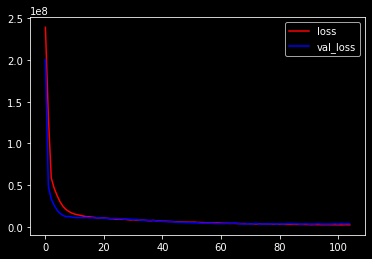

In [48]:
a = pd.DataFrame(data = model.history.history)
a[['loss', 'val_loss']].plot(color = ['red', 'blue'])

In [49]:
k_reg_pred = model.predict(X_test)
pred1 = pd.DataFrame(data = y_test, columns = ['true'])
pred2 = pd.DataFrame(data = k_reg_pred, columns = ['predictions'])
pred = pd.concat([pred1, pred2], axis = 1)
print (pred)
print (explained_variance_score(y_test, k_reg_pred))

       true   predictions
0    9258.0   7325.644531
1    6575.0   6260.244629
2    6695.0   7162.736816
3    9279.0   7611.705566
4    9960.0   9199.724609
5   10198.0   9140.396484
6    8499.0   9631.103516
7   11595.0  10642.946289
8   17950.0  15141.412109
9   18280.0  14689.140625
10   7995.0   9677.078125
11  14489.0  12762.433594
12  12945.0  10096.547852
13   7799.0   7126.123535
14   7898.0   8326.308594
15  14399.0  14657.482422
16  11900.0  12819.006836
17   6989.0   9238.838867
18  18420.0  19508.402344
19  11259.0  10771.773438
20  17199.0  16437.080078
21  17450.0  14241.774414
22   7788.0   8081.086914
23  16430.0  14580.027344
24   7295.0   7478.440430
25  16630.0  12990.983398
26  16515.0  14368.677734
27   7609.0   7480.706543
28   6649.0   7156.210449
29   7999.0   7212.303223
30  20970.0  23261.843750
31  15998.0  19009.623047
32   5348.0   6423.686035
33  40960.0  42558.074219
34  31600.0  30258.857422
35   5572.0   6121.411621
36  10945.0  12571.019531
37  22018.0 

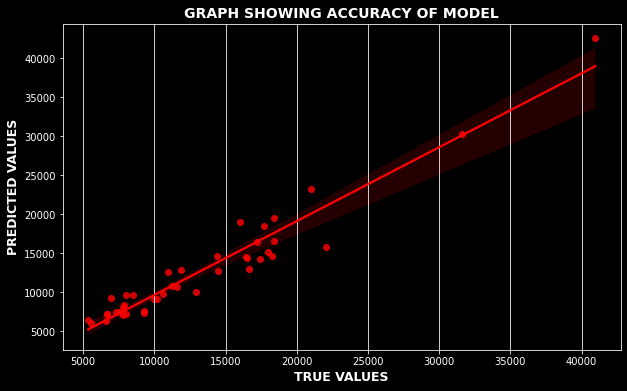

In [50]:
plt.style.use('dark_background')
plt.figure(figsize =(10,6))
sns.regplot(x= 'true', y = 'predictions', data = pred, color = 'red')
plt.tick_params(axis = 'both', labelsize = 10, labelcolor = 'white')
plt.xlabel('TRUE VALUES', fontsize = 12.5, fontweight = 'bold', color = 'white')
plt.ylabel('PREDICTED VALUES', fontsize = 12.5, fontweight = 'bold', color = 'white')
plt.title('GRAPH SHOWING ACCURACY OF MODEL', fontsize = 14, fontweight = 'bold', color = 'white')
plt.grid(axis = 'x')
plt.savefig('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/IMAGES/ML_gig/car_level_reg.png')

In [51]:
pred.to_excel('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/preds.xlsx')

In [52]:
print (data.columns)

Index(['Symboling', 'Fuel Type', 'Aspiration', 'Door Number', 'Drive Wheel',
       'Engine Location', 'Wheelbase', 'Car Length', 'Car Width', 'Car Height',
       'Curb Weight', 'Engine Size', 'Bore Ratio', 'Stroke',
       'Compression Ratio', 'Horsepower', 'Peakrpm', 'City mpg', 'Highway mpg',
       'Price', 'hardtop', 'hatchback', 'sedan', 'wagon', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')


In [53]:
a = np.zeros(4)
print (a)

[0. 0. 0. 0.]
